In [1]:
import os
import h5py
import pickle
import dynesty
import numpy as np
from tqdm import tqdm

import astropy.units as u
import matplotlib.pyplot as plt
from multiprocessing import Pool

import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic

import astropy.coordinates as coord
_ = coord.galactocentric_frame_defaults.set('v4.0')

import scipy
from scipy.stats import norm, chi2
from scipy.integrate import quad

In [2]:
from dynesty_streams import prior_transform, model, log_likelihood_GMM

In [3]:
sigma = 3
size_data = 100

r_data     = 50*np.ones(size_data)
theta_data = np.linspace(0, np.pi, size_data)

x_data = r_data*np.cos(theta_data) + np.random.uniform(0, sigma, size=size_data)
y_data = r_data*np.sin(theta_data) + np.random.uniform(0, sigma, size=size_data)

dict_data = {'x': x_data, 'y': y_data, 'sigma': sigma}

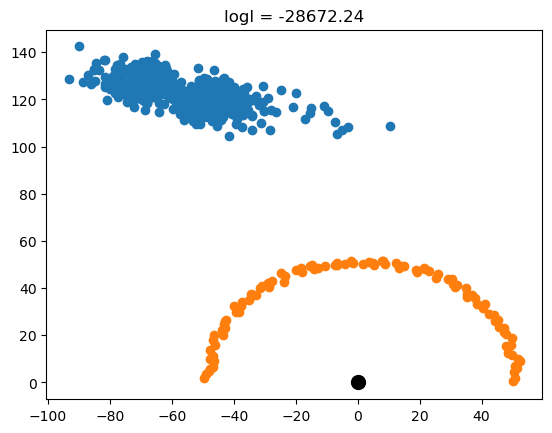

In [12]:
ndim = 17
p0 = np.random.uniform(0, 1, size=ndim)
params = prior_transform(p0)
x_stream, y_stream = model(params)

logl = log_likelihood_GMM(params, dict_data)

plt.title(f'logl = {logl:.02f}')
plt.scatter(x_stream, y_stream)
plt.scatter(x_data, y_data)
plt.scatter(0,0, c='k', s=100)